**Introduction**

This data comes from the Vancouver Open Data Catalogue.
It was extracted on 2017-07-18 and it contains 530,652 records from 2003-01-01 to 2017-07-13.

My focus will be on:
* What neighbourhoods are mentioned in this dataset
* How many crimes were committed in these neighbourhoods
* What year had the most crimes
* What types of crimes were committed

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load dataset**

In [2]:
crime = pd.read_csv("../input/crime-in-vancouver/crime.csv")

**Undertanding the data**

In [3]:
crime.shape

(530652, 12)

In [4]:
print('The Number of Rows in the Dataset are',crime.shape[0],'\nThe Number of Columns in the Dataset are ',crime.shape[1])

The Number of Rows in the Dataset are 530652 
The Number of Columns in the Dataset are  12


In [5]:
crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [6]:
crime.tail()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530649,Offence Against a Person,2017,4,13,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031
530651,Vehicle Collision or Pedestrian Struck (with I...,2017,6,6,17.0,38.0,13XX BLOCK PARK DR,Marpole,490204.00,5451444.00,49.215706,-123.134512


In [7]:
crime.nunique()

TYPE                 11
YEAR                 15
MONTH                12
DAY                  31
HOUR                 24
MINUTE               60
HUNDRED_BLOCK     21204
NEIGHBOURHOOD        24
X                 95502
Y                 93544
Latitude         101885
Longitude         98972
dtype: int64

This tells us a few things:
* There are 11 distinct types of crimes in this dataset
* 24 noted neighbourhoods
* The count for days and year is valid

**Checking for missing data**

In [8]:
crime.isnull().sum()

TYPE                 0
YEAR                 0
MONTH                0
DAY                  0
HOUR             54362
MINUTE           54362
HUNDRED_BLOCK       13
NEIGHBOURHOOD    56624
X                    0
Y                    0
Latitude             0
Longitude            0
dtype: int64

**Cleaning the data**

I'll be dropping columns I won't be looking into & empty rows

In [9]:
crime.drop(['MINUTE', 'X', 'Y', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [10]:
crime.dropna(inplace=True)

In [11]:
crime.shape

(474015, 7)

In [12]:
crime.tail()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD
530646,Mischief,2017,1,18,14.0,14XX E HASTINGS ST,Grandview-Woodland
530647,Break and Enter Residential/Other,2017,3,3,9.0,31XX ADANAC ST,Hastings-Sunrise
530648,Mischief,2017,5,29,22.0,14XX E 7TH AVE,Grandview-Woodland
530650,Theft from Vehicle,2017,6,5,17.0,8XX HAMILTON ST,Central Business District
530651,Vehicle Collision or Pedestrian Struck (with I...,2017,6,6,17.0,13XX BLOCK PARK DR,Marpole


This will reset the index 

In [13]:
crime.reset_index(drop=True, inplace=True)

In [14]:
crime

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD
0,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona
1,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona
2,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona
3,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona
4,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona
...,...,...,...,...,...,...,...
474010,Mischief,2017,1,18,14.0,14XX E HASTINGS ST,Grandview-Woodland
474011,Break and Enter Residential/Other,2017,3,3,9.0,31XX ADANAC ST,Hastings-Sunrise
474012,Mischief,2017,5,29,22.0,14XX E 7TH AVE,Grandview-Woodland
474013,Theft from Vehicle,2017,6,5,17.0,8XX HAMILTON ST,Central Business District


All missing values have been dropped, along with columns I will not focus on.

**The analysis**

**1. How many neighbourhoods are listed and what are they?**

In [15]:
print('There are ' + str(crime.NEIGHBOURHOOD.nunique()) + ' listed neighbourhoods, and they are:')
print(crime.NEIGHBOURHOOD.unique())

There are 24 listed neighbourhoods, and they are:
['Strathcona' 'Kerrisdale' 'Dunbar-Southlands' 'Grandview-Woodland'
 'Sunset' 'West End' 'Central Business District' 'Hastings-Sunrise'
 'Victoria-Fraserview' 'Fairview' 'Kensington-Cedar Cottage'
 'West Point Grey' 'Shaughnessy' 'Renfrew-Collingwood' 'Killarney'
 'Riley Park' 'Arbutus Ridge' 'Musqueam' 'Mount Pleasant' 'Kitsilano'
 'Stanley Park' 'South Cambie' 'Marpole' 'Oakridge']


**2. How many crimes were commited in these neighbourhoods?**

In [16]:
nc = pd.DataFrame([crime['YEAR'], crime['NEIGHBOURHOOD'], crime['TYPE']]).T 
#nc = neighbourhood-crime

In [17]:
nc.head()

,YEAR,NEIGHBOURHOOD,TYPE
0,2003,Strathcona,Other Theft
1,2003,Strathcona,Other Theft
2,2003,Strathcona,Other Theft
3,2003,Strathcona,Other Theft
4,2003,Strathcona,Other Theft


In [18]:
ncavg = nc.groupby(['YEAR','NEIGHBOURHOOD']).count().reset_index()
ncavg.head()

,YEAR,NEIGHBOURHOOD,TYPE
0,2003,Arbutus Ridge,616
1,2003,Central Business District,9818
2,2003,Dunbar-Southlands,773
3,2003,Fairview,3476
4,2003,Grandview-Woodland,3140


In [19]:
ncavg = ncavg.drop('YEAR', axis = 1)
ncavg.columns = ["Neighborhood", "Avg"]
ncavg = ncavg.groupby(['Neighborhood'])['Avg'].mean()
ncavg.head()

Neighborhood
Arbutus Ridge                 404.400000
Central Business District    7396.333333
Dunbar-Southlands             516.400000
Fairview                     2144.066667
Grandview-Woodland           1812.000000
Name: Avg, dtype: float64

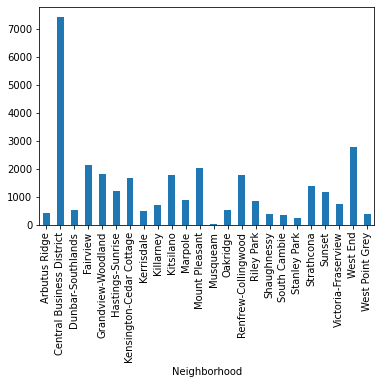

In [20]:
plotnc = ncavg.plot(kind = 'bar')

This shows that Central Business District has the the highest average number of crimes with West End being second. 

**3. What year were most crimes committed?**

In [21]:
yc = pd.DataFrame([crime['YEAR'], crime['TYPE']]).T
yc.head()

,YEAR,TYPE
0,2003,Other Theft
1,2003,Other Theft
2,2003,Other Theft
3,2003,Other Theft
4,2003,Other Theft


In [22]:
#yc = year-crime
ycTotal = yc.groupby(['YEAR']).count().reset_index()
ycTotal.columns = ['Year','Total']
ycTotal

,Year,Total
0,2003,45885
1,2004,45035
2,2005,40522
3,2006,37767
4,2007,33161
5,2008,31070
6,2009,28197
7,2010,25874
8,2011,24633
9,2012,25378


Text(0.5, 1.0, '# of crime per year in Vancouver')

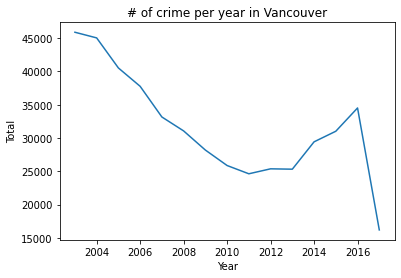

In [23]:
sns.lineplot(data=ycTotal, x="Year", y="Total").set_title('# of crime per year in Vancouver')

Overall the crime in Vancouver has decreased but the graph shows a spike in crime between 2013-2016.

**4. What types of crime were committed?**

In [24]:
#tc = type-crime
tc = pd.DataFrame(crime['TYPE'])
tc.head()

,TYPE
0,Other Theft
1,Other Theft
2,Other Theft
3,Other Theft
4,Other Theft


In [25]:
tcCount = tc['TYPE'].value_counts()
tcCount

Theft from Vehicle                                        170889
Mischief                                                   70157
Break and Enter Residential/Other                          60856
Other Theft                                                52160
Theft of Vehicle                                           38351
Break and Enter Commercial                                 33841
Theft of Bicycle                                           25620
Vehicle Collision or Pedestrian Struck (with Injury)       21887
Vehicle Collision or Pedestrian Struck (with Fatality)       254
Name: TYPE, dtype: int64

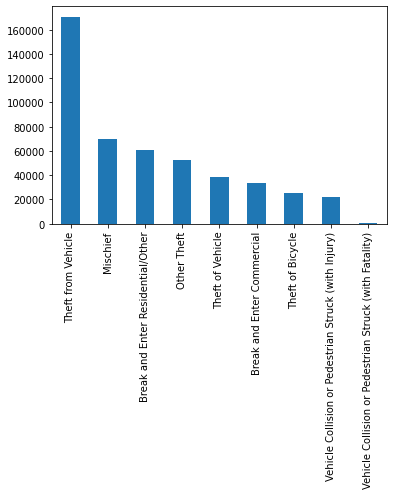

In [26]:
plottc = tcCount.plot(kind = 'bar')

Theft from Vehicle looks to be the most common crime in Vancouver.

**Conclusion**

1. There are 24 neighbourhoods and Central Business district is the neighbourhood with the highest number of crimes.
2. I've visualized the trend in the number of crimes across 2003 - 2017 and highlighted the spike in crimes between 2013-2016.
3. Theft from Vehicles is the most common crime with a count of 170889.